## Packages

In [26]:
import os
from glob import glob

import numpy as np

import tensorflow as tf
import tensorflow.keras.layers as layers
from PIL import Image

import matplotlib.pyplot as plt
%matplotlib inline

## Data Explore

In [6]:
data_paths = glob('dataset/cifar/train/*.png')
data_paths[0]

'dataset/cifar/train/39769_automobile.png'

In [7]:
path = data_paths[0]
path

'dataset/cifar/train/39769_automobile.png'

In [9]:
gfile = tf.io.read_file(path)
image = tf.io.decode_image(gfile)
image.shape

2021-08-11 13:25:57.277896: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:982] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-08-11 13:25:57.278321: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1716] Found device 0 with properties: 
pciBusID: 0000:01:00.0 name: GeForce RTX 2080 Ti computeCapability: 7.5
coreClock: 1.545GHz coreCount: 68 deviceMemorySize: 10.76GiB deviceMemoryBandwidth: 573.69GiB/s
2021-08-11 13:25:57.278389: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:982] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-08-11 13:25:57.278759: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1716] Found device 1 with properties: 
pciBusID: 0000:02:00.0 name: GeForce RTX 2080 Ti computeCapability: 7.5
coreClock: 1.545GHz coreCount: 68 deviceMemorySize: 10.76GiB deviceMemoryBandwidth: 

TensorShape([32, 32, 3])

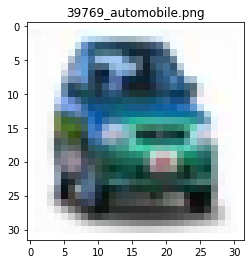

In [11]:
plt.title(os.path.basename(path))
plt.imshow(image)

## tf.data - from_tensor_slices

In [13]:
data_paths[:10]

['dataset/cifar/train/39769_automobile.png',
 'dataset/cifar/train/44545_airplane.png',
 'dataset/cifar/train/2936_bird.png',
 'dataset/cifar/train/7063_cat.png',
 'dataset/cifar/train/38360_cat.png',
 'dataset/cifar/train/3461_cat.png',
 'dataset/cifar/train/9978_frog.png',
 'dataset/cifar/train/1910_deer.png',
 'dataset/cifar/train/7008_bird.png',
 'dataset/cifar/train/41144_cat.png']

In [14]:
def read_image(path):
    gfile = tf.io.read_file(path)
    image = tf.io.decode_image(gfile)
    return image

In [16]:
train_dataset = tf.data.Dataset.from_tensor_slices(data_paths)
train_dataset = train_dataset.map(read_image)

In [17]:
tf_image = next(iter(train_dataset))

In [18]:
tf_image.shape

TensorShape([32, 32, 3])

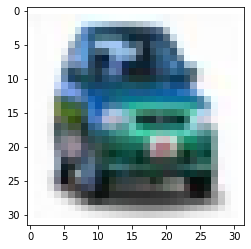

In [19]:
plt.imshow(tf_image)

## using Batch

In [20]:
batch_size = 8

train_dataset = tf.data.Dataset.from_tensor_slices(data_paths)
train_dataset = train_dataset.map(read_image)
train_dataset = train_dataset.batch(batch_size)

In [21]:
tf_image = next(iter(train_dataset))
tf_image.shape

TensorShape([8, 32, 32, 3])

## using Shuffle

In [23]:
batch_size = 8

train_dataset = tf.data.Dataset.from_tensor_slices(data_paths)
train_dataset = train_dataset.map(read_image)
train_dataset = train_dataset.batch(batch_size)
train_dataset = train_dataset.shuffle(buffer_size=len(data_paths))

In [24]:
tf_image = next(iter(train_dataset))

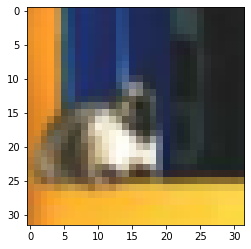

In [26]:
plt.imshow(tf_image[0])

## with Label

In [27]:
path

'dataset/cifar/train/39769_automobile.png'

In [29]:
path.split('_')[-1].replace('.png', '')

'automobile'

In [30]:
def get_label(path):
    return path.split('_')[-1].replace('.png', '')

In [31]:
path, get_label(path)

('dataset/cifar/train/39769_automobile.png', 'automobile')

In [32]:
label_names = [get_label(path) for path in data_paths]

In [33]:
class_names = np.unique(label_names)
class_names

array(['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog',
       'horse', 'ship', 'truck'], dtype='<U10')

In [44]:
def onehot_encoding(label):
    return np.array(class_names == label, np.uint8)

In [42]:
def read_image_label(path, label):
    gfile = tf.io.read_file(path)
    image = tf.io.decode_image(gfile)
    return image

In [38]:
data_paths[:5]

['dataset/cifar/train/39769_automobile.png',
 'dataset/cifar/train/44545_airplane.png',
 'dataset/cifar/train/2936_bird.png',
 'dataset/cifar/train/7063_cat.png',
 'dataset/cifar/train/38360_cat.png']

In [40]:
label_names[:5]

['automobile', 'airplane', 'bird', 'cat', 'cat']

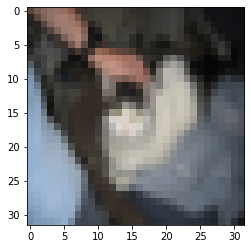

In [53]:
batch_size = 8

train_dataset = tf.data.Dataset.from_tensor_slices((data_paths, label_names))
train_dataset = train_dataset.map(read_image_label)
train_dataset = train_dataset.batch(batch_size)
train_dataset = train_dataset.shuffle(buffer_size=len(data_paths))
                                                   
tf_image = next(iter(train_dataset))
plt.imshow(tf_image[0])

In [45]:
fname = tf.strings.split(path, '_')[-1]
fname

<tf.Tensor: shape=(), dtype=string, numpy=b'automobile.png'>

In [46]:
cls_name = tf.strings.regex_replace(fname, '.png', '')
cls_name

<tf.Tensor: shape=(), dtype=string, numpy=b'automobile'>

In [47]:
class_names

array(['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog',
       'horse', 'ship', 'truck'], dtype='<U10')

In [48]:
class_names == cls_name

<tf.Tensor: shape=(10,), dtype=bool, numpy=
array([False,  True, False, False, False, False, False, False, False,
       False])>

In [50]:
onehot_encoding = tf.cast(class_names == cls_name, tf.uint8)
onehot_encoding

<tf.Tensor: shape=(10,), dtype=uint8, numpy=array([0, 1, 0, 0, 0, 0, 0, 0, 0, 0], dtype=uint8)>

In [51]:
def get_label(path):
    fname = tf.strings.split(path, '_')[-1]
    cls_name = tf.strings.regex_replace(fname, '.png', '')
    onehot_encoding = tf.cast(class_names == cls_name, tf.uint8)
    return onehot_encoding

In [55]:
def read_image(path):
    # read image
    gfile = tf.io.read_file(path)
    image = tf.io.decode_image(gfile)
    # get label
    label = get_label(path)
    return image, label

/home/ziippy/venv_tf2/lib/python3.8/site-packages/matplotlib/text.py:1215: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


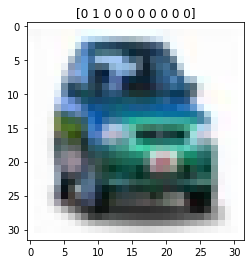

In [59]:
batch_size = 8

train_dataset = tf.data.Dataset.from_tensor_slices(data_paths)
train_dataset = train_dataset.map(read_image)
train_dataset = train_dataset.batch(batch_size)
train_dataset = train_dataset.repeat()
                                                   
tf_image, tf_label = next(iter(train_dataset))
plt.title(np.array(tf_label[0]))
plt.imshow(tf_image[0])

## Training

In [16]:
train_paths = glob('dataset/cifar/train/*.png')
test_paths = glob('dataset/cifar/train/*.png')

path = train_paths[0]

In [7]:
def get_class_name(path):
    fname = tf.strings.split(path, '_')[-1]
    class_name = tf.strings.regex_replace(fname, '.png', '')
    return class_name

In [8]:
class_names = [get_class_name(path) for path in train_paths]

In [11]:
classes = tf.unique(class_names).y.numpy()
classes

array([b'automobile', b'airplane', b'bird', b'cat', b'frog', b'deer',
       b'dog', b'horse', b'ship', b'truck'], dtype=object)

In [22]:
def get_label(path):
    class_name = get_class_name(path)
    onehot_encoding = tf.cast(classes == class_name, tf.uint8)
    return onehot_encoding

def read_dataset(path):
    # image
    gfile = tf.io.read_file(path)
    image = tf.io.decode_image(gfile)
    
    # normalization
    image = tf.cast(image, tf.float32) / 255.

    #label
    label = get_label(path)
    return image, label

In [17]:
image, label = read_dataset(path)
image.shape, label.shape

(TensorShape([32, 32, 3]), TensorShape([10]))

In [18]:
def image_preprocessing(image, label):
    image = tf.image.random_flip_left_right(image)
    image = tf.image.random_flip_up_down(image)
    return image, label

In [20]:
transformed, label = image_preprocessing(image, label)

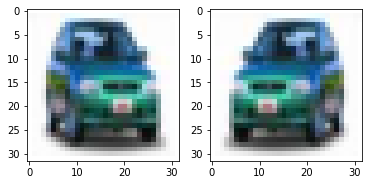

In [21]:
plt.subplot(121)
plt.imshow(image)

plt.subplot(122)
plt.imshow(transformed)

In [23]:
batch_size = 8

train_dataset = tf.data.Dataset.from_tensor_slices(train_paths)
train_dataset = train_dataset.map(read_dataset)
train_dataset = train_dataset.map(image_preprocessing) # transformed
train_dataset = train_dataset.batch(batch_size)
train_dataset = train_dataset.shuffle(buffer_size=len(train_paths))
train_dataset = train_dataset.repeat()

In [24]:
test_dataset = tf.data.Dataset.from_tensor_slices(test_paths)
test_dataset = test_dataset.map(read_dataset)
test_dataset = test_dataset.batch(batch_size)
test_dataset = test_dataset.shuffle(buffer_size=len(test_paths))
test_dataset = test_dataset.repeat()

In [32]:
inputs = layers.Input((32, 32, 3))

net = layers.Conv2D(32, (3, 3), padding='SAME', activation='relu')(inputs)
net = layers.Conv2D(32, (3, 3), padding='SAME', activation='relu')(net)
net = layers.MaxPooling2D((2,2))(net)
net = layers.Dropout(0.2)(net)

net = layers.Conv2D(64, (3, 3), padding='SAME', activation='relu')(net)
net = layers.Conv2D(64, (3, 3), padding='SAME', activation='relu')(net)
net = layers.MaxPooling2D((2,2))(net)
net = layers.Dropout(0.2)(net)

net = layers.Flatten()(net)
net = layers.Dense(512, activation='relu')(net)
net = layers.Dropout(0.2)(net)
net = layers.Dense(10, activation='softmax')(net)

model = tf.keras.Model(inputs=inputs,
                      outputs=net,
                      name='Basic_CNN')

# model.summary()

In [33]:
loss = 'categorical_crossentropy'
optimizer = 'adam'
metrics = ['accuracy']

In [34]:
model.compile(optimizer=optimizer,
             loss=loss,
             metrics=metrics)

In [35]:
num_classes = 10
epochs = 3

hist = model.fit_generator(train_dataset,
                          steps_per_epoch=len(train_paths) // batch_size,
                          epochs=epochs,
                          validation_data=test_dataset,
                          validation_steps=len(test_paths) // batch_size)

Epoch 1/3


2021-08-11 18:21:27.657686: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:172] Filling up shuffle buffer (this may take a while): 9629 of 50000


   1/6250 [..............................] - ETA: 2s - loss: 2.2859 - accuracy: 0.1250

2021-08-11 18:21:36.485297: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:221] Shuffle buffer filled.


6218/6250 [============================>.] - ETA: 0s - loss: 1.6855 - accuracy: 0.3728

2021-08-11 18:21:56.274534: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:172] Filling up shuffle buffer (this may take a while): 13455 of 50000
2021-08-11 18:21:59.963149: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:221] Shuffle buffer filled.


6250/6250 [==============================] - 29s 5ms/step - loss: 1.6846 - accuracy: 0.3733 - val_loss: 1.3450 - val_accuracy: 0.5110
Epoch 2/3
6218/6250 [============================>.] - ETA: 0s - loss: 1.3544 - accuracy: 0.5099

2021-08-11 18:22:24.867463: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:172] Filling up shuffle buffer (this may take a while): 14797 of 50000
2021-08-11 18:22:27.555423: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:221] Shuffle buffer filled.


6250/6250 [==============================] - 28s 4ms/step - loss: 1.3545 - accuracy: 0.5097 - val_loss: 1.1590 - val_accuracy: 0.5855
Epoch 3/3
6249/6250 [============================>.] - ETA: 0s - loss: 1.2525 - accuracy: 0.5495

2021-08-11 18:22:52.120803: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:172] Filling up shuffle buffer (this may take a while): 14827 of 50000
2021-08-11 18:22:54.756755: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:221] Shuffle buffer filled.


6250/6250 [==============================] - 27s 4ms/step - loss: 1.2525 - accuracy: 0.5496 - val_loss: 1.0771 - val_accuracy: 0.6177
